In [79]:
!pip install vaderSentiment

In [80]:
!pip install spacy

In [81]:
!python -m spacy download en_core_web_md

2023-09-27 03:37:45.767258: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [82]:
#importing libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.linear_model import LinearRegression
from itertools import product
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from numpy.linalg import norm
from math import log
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment  import  SentimentIntensityAnalyzer
import spacy
stopwords = stopwords.words('english')


%matplotlib inline
sns.set(color_codes = True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
df=pd.read_excel('/content/drive/MyDrive/beer-reviews.xlsx')


## Task A.
Extract about 5-6k reviews.

**Need to explain how we did scraping**


In [85]:
df.head()

,item,body,rating
0,Kentucky Brunch Brand Stout,"Amazing stout, expensive but worth the price!",5.00
1,Kentucky Brunch Brand Stout,This beer meet and exceeded all the unreal hyp...,5.00
2,Kentucky Brunch Brand Stout,Let it sit and warm to the room a little ... u...,5.00
3,Kentucky Brunch Brand Stout,"A small pour, ebony dark, no real head. Intens...",4.67
4,Kentucky Brunch Brand Stout,"Vintage 2022, served on tap at Toppling Goliat...",5.00


In [86]:
#preprocessing steps
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words = [word for word in filtered_words if word.isalnum()]
    return " ".join(filtered_words)
df['body']=df['body'].str.lower()

df['body'] = df['body'].astype(str).apply(remove_stopwords)
df['body']


0                     amazing stout expensive worth price
1           beer meet exceeded unreal hype simply amazing
2                   let sit warm room little unbelievable
3       small pour ebony dark real head intense rich a...
4       vintage 2022 served tap toppling goliath snuli...
                              ...                        
6627    good god man holy shit really good beer blesse...
6628    appearance bubble show lifts head fullsome thr...
6629    pours sure describe color golden yellow brown ...
6630    tropical nose sweet like sunnyd nice acidity a...
6631        worst mouthfeel carbonation excessively sweet
Name: body, Length: 6632, dtype: object

# Task B
Assume that a customer, who will be using this recommender system, has specified 3 attributes
in a product. E.g., one website describes multiple attributes of beer (but you should choose attributes
from the actual data)
Perform a word frequency analysis of beer reviews is a better way
to find important attributes in the actual data.

In [87]:
#We selected a list of beer related attributes from https://www.dummies.com/article/home-auto-hobbies/food-drink/beverages/beer/beer-for-dummies-cheat-sheet-208452/""

beer_attributes = [
    "aromatic", "hoppy", "malty", "bitter", "sweet", "sour", "fruity", "citrusy", "spicy", "floral", "earthy", "woody", "herbal", "caramel",
    "roasty", "nutty", "chocolatey", "smoky", "creamy", "crisp", "smooth", "hazy", "clear", "cloudy", "full-bodied", "light-bodied",
    "refreshing", "complex", "balanced", "robust", "dry", "sweetness", "alcohol content", "carbonation", "mouthfeel", "aftertaste",
    "head retention", "astringency", "esters", "phenols", "acidity", "diacetyl", "yeastiness", "clarification", "oxidation", "temperature",
    "abv (alcohol by volume)", "ibu (international bitterness units)", "srm (standard reference method)", "gravity", "fermentation", "lagering",
    "ale", "pilsner", "stout", "porter", "wheat", "lambic", "saison", "ipa (india pale ale)", "apa (american pale ale)", "dipa (double ipa)",
    "tripel", "quadrupel", "belgian", "german", "british", "american", "czech", "irish", "scottish", "baltic", "hefeweizen", "kolsch", "barleywine",
    "sours", "barrel-aged", "tropical", "funky", "crispy", "toasty", "tangy", "savory", "juicy", "effervescent", "velvety", "silky", "pungent",
    "robust", "elegant", "velvety", "bold", "harmonious", "well-rounded", "intense", "layered"]

In [88]:
# Calculate word frequencies using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['body'])

# Calculate the frequency of each word in the reviews
word_frequencies = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': np.array(X.sum(axis=0))[0]})
word_frequencies=word_frequencies.sort_values(['frequency'],ascending=False)
word_frequencies

,word,frequency
1829,beer,5266
7320,head,3650
14880,taste,3483
8867,light,2891
8885,like,2537
...,...,...
7520,hoax,1
7521,hobbyists,1
7526,hog,1
7527,hogan,1


In [89]:
#Implementing keyword search based on the selected attributes
word_list = list(word_frequencies['word'])
attributes = [x for x in word_list if x in beer_attributes]
print(attributes)

['sweet', 'carbonation', 'mouthfeel', 'smooth', 'caramel', 'clear', 'sweetness', 'dry', 'bitter', 'malty', 'creamy', 'stout', 'balanced', 'crisp', 'hazy', 'earthy', 'ale', 'sour', 'aftertaste', 'floral', 'fruity', 'refreshing', 'spicy', 'complex', 'hoppy', 'belgian', 'herbal', 'tropical', 'american', 'wheat', 'juicy', 'cloudy', 'funky', 'roasty', 'woody', 'intense', 'silky', 'pilsner', 'porter', 'bold', 'acidity', 'citrusy', 'toasty', 'nutty', 'german', 'barleywine', 'esters', 'saison', 'temperature', 'tripel', 'robust', 'effervescent', 'velvety', 'tangy', 'lambic', 'gravity', 'astringency', 'smoky', 'pungent', 'aromatic', 'hefeweizen', 'oxidation', 'diacetyl', 'chocolatey', 'sours', 'savory', 'phenols', 'fermentation', 'layered', 'irish', 'british', 'elegant', 'crispy', 'czech', 'yeastiness', 'baltic', 'quadrupel', 'scottish', 'harmonious', 'kolsch']


In [90]:
array_df = pd.DataFrame({'attribute': attributes})
attr_word_freq=word_frequencies.merge(array_df,left_on='word', right_on='attribute')
attr_word_freq= attr_word_freq.drop('attribute',axis=1)
attr_word_freq

,word,frequency
0,sweet,2146
1,carbonation,1826
2,mouthfeel,1176
3,smooth,1042
4,caramel,966
...,...,...
75,baltic,8
76,quadrupel,5
77,scottish,3
78,harmonious,3


**"Sweet", "carbonation" and "mouthfeel" are most frequently used attributes as per the analysis. We will ignore "Sweet" since it can be used to describe mood as well and "Mouthfeel" since it is more of an umbrella term. Hence the 3 attributes selected are "carbonation", "smooth" and "caramel"**

## Task C

Perform a similarity analysis using cosine similarity (without word embeddings) with the 3 attributes specified by the customer and the reviews.
The similarity script should accept as input a file with the product attributes, and calculate similarity scores (between 0 and 1) between these attributes and each review. That is, the output file should have 3 columns – product_name (for each product, the product_name will repeat as many times as there are reviews of the product), product_review and similarity_score.


In [91]:
#open text file in read mode
text_file = open("/content/drive/MyDrive/attributes.txt", "r")
user_pref = text_file.read().lower()
#close file

text_file.close()

words_to_compare = user_pref.split(',')

words_to_compare = [word.strip() for word in words_to_compare]

words_to_compare


['carbonation', 'smooth', 'caramel']

In [92]:
import numpy as np

# Assuming 'result_df' contains columns 'item' and 'body' as you mentioned
result_df = df[['item', 'body']]

# Split the 'body' column into lists of words
result_df['body'] = result_df['body'].apply(lambda x: x.split())

# Calculate the cosine similarity for each row
def calculate_cosine_similarity(words1, words2):
    # Convert the lists of words to sets to remove duplicates
    set1 = set(words1)
    set2 = set(words2)

    # Calculate the intersection (common words)
    intersection = set1.intersection(set2)

    # Calculate the cosine similarity using the formula
    if len(set1) == 0 or len(set2) == 0:
        return 0.0  # Handle the case of empty sets to avoid division by zero
    else:
        cosine_similarity = len(intersection) / (np.sqrt(len(set1)) * np.sqrt(len(set2)))
        return cosine_similarity

# Calculate the similarity score for each row
result_df['similarity score'] = result_df.apply(lambda row: calculate_cosine_similarity(words_to_compare, row['body']), axis=1)
result_df['body'] = df['body']
# Sort the DataFrame by 'similarity score' in descending order
result_df.sort_values(by='similarity score', ascending=False, inplace=True)

# Display the sorted DataFrame
result_df


<ipython-input-92-4f9e5fb2e163>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['body'] = result_df['body'].apply(lambda x: x.split())


,item,body,similarity score
3672,Upper Case,smooth 9,0.408248
2253,Honker's Ale,smooth drink,0.408248
6573,A Deal With The Devil - Double Oak-Aged,thick sweet big barrel flavors smooth sign hop...,0.397360
3040,Voodoo Ranger Juicy Haze IPA,smooth tasting yummy,0.333333
3224,Old Stock Cellar Reserve (Aged In Brandy Barrels),2020 version bottle pour snifter looks like br...,0.327327
...,...,...,...
2757,Genesee Ice Beer,12 ounce poured nonic tumbler l white head min...,0.000000
2756,Genesee Ice Beer,average ice beer refreshing hot summer day,0.000000
2755,Genesee Ice Beer,bought 24oz budget much sense appearance smell...,0.000000
2754,Palma Louca Pale Pilsner,really digging wild palm nice drinkability ful...,0.000000


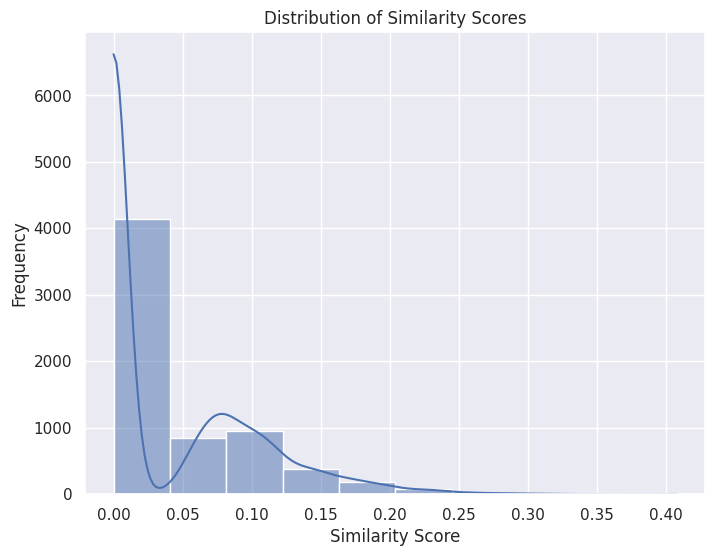

In [93]:
# Plot the distribution of similarity scores
plt.figure(figsize=(8, 6))
sns.histplot(data=result_df, x='similarity score', bins=10, kde=True)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity Scores')
plt.show()

## Task D

For every review, perform a sentiment analysis (using VADER or any LLM). In case you have to change the default values of words in the VADER lexicon

In [94]:
#manually initializing the default sentiment scores for our attributes to 0 in Vader lexicon
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


new_words = {
    words_to_compare[0] : 0,
    words_to_compare[1] : 0,
    words_to_compare[2] : 0
}


analyzer.lexicon.update(new_words)


In [95]:
# Function to perform sentiment analysis using VADER
def perform_sentiment_analysis(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

sentiment_similarity_df = result_df
sentiment_similarity_df.rename(columns={'item':'Product Name'},inplace = True)
# Applying sentiment analysis to each review and store the scores in a new column
sentiment_similarity_df['Sentiment Scores'] = sentiment_similarity_df['body'].apply(perform_sentiment_analysis)

sentiment_similarity_df

,Product Name,body,similarity score,Sentiment Scores
3672,Upper Case,smooth 9,0.408248,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2253,Honker's Ale,smooth drink,0.408248,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6573,A Deal With The Devil - Double Oak-Aged,thick sweet big barrel flavors smooth sign hop...,0.397360,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp..."
3040,Voodoo Ranger Juicy Haze IPA,smooth tasting yummy,0.333333,"{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou..."
3224,Old Stock Cellar Reserve (Aged In Brandy Barrels),2020 version bottle pour snifter looks like br...,0.327327,"{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'comp..."
...,...,...,...,...
2757,Genesee Ice Beer,12 ounce poured nonic tumbler l white head min...,0.000000,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp..."
2756,Genesee Ice Beer,average ice beer refreshing hot summer day,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2755,Genesee Ice Beer,bought 24oz budget much sense appearance smell...,0.000000,"{'neg': 0.232, 'neu': 0.461, 'pos': 0.307, 'co..."
2754,Palma Louca Pale Pilsner,really digging wild palm nice drinkability ful...,0.000000,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp..."


## Task E

Create an evaluation score for each beer that uses both similarity and sentiment scores.
Now recommend 3 products to the customer.


In [97]:
# Function to calculate the evaluation score using
def calculate_evaluation_score(similarity_score, sentiment_score):
    overall_sentiment_score = sentiment_score['compound']
    # Calculate the evaluation score as a weighted sum
    evaluation_score = similarity_score*overall_sentiment_score
    return evaluation_score

# Calculate the evaluation score for each beer
sentiment_similarity_df['Evaluation Score'] = sentiment_similarity_df.apply(lambda x: calculate_evaluation_score(x['similarity score'], x['Sentiment Scores']), axis=1)

# Group by 'Product Name' and calculate the mean of 'Evaluation Score' for each product
sentiment_similarity_df = sentiment_similarity_df.groupby('Product Name')['Evaluation Score'].mean().reset_index()

# Sort the products by their average evaluation scores in descending order
sentiment_similarity_df.sort_values(by='Evaluation Score', ascending=False, inplace=True)

# Display the DataFrame with sorted results
sentiment_similarity_df




,Product Name,Evaluation Score
543,Miles To Go Before I Sleep,0.141856
411,Hop Rod Rye,0.126886
299,Double Sunshine,0.118252
148,Brewer's Reserve Bourbon Barrel Stout,0.117937
839,Triple Sunshine,0.115529
...,...,...
799,Tennent's Super Strong Lager,-0.012873
697,Redd's Apple Ale,-0.014598
686,Raison D'√ätre,-0.018215
50,Apex,-0.052324


In [98]:
# Display the top 3 recommended products
print('The top 3 recommended products based on evaluation score are:')
sentiment_similarity_df.head(3)


The top 3 recommended products based on evaluation score are:


,Product Name,Evaluation Score
543,Miles To Go Before I Sleep,0.141856
411,Hop Rod Rye,0.126886
299,Double Sunshine,0.118252


# Task F

In [99]:
# Load spaCy with medium-sized pretrained word vectors
nlp = spacy.load('en_core_web_md')

words_to_compare=' '.join(words_to_compare)
# Function to calculate word vector similarity
def word_vector_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)

def calculate_evaluation_score(row):
    similarity_score = row['Similarity Score']
    sentiment_score = row['Sentiment Score']['compound']

    evaluation_score = similarity_score * sentiment_score
    return evaluation_score

# Create a new DataFrame with product name, product review, and similarity score
result_df = pd.DataFrame({
    'Product Name': df['item'],
    'Product Review': df['body'],
    'Similarity Score': ''
})

result_df['Similarity Score'] = result_df['Product Review'].apply(word_vector_similarity, text2=words_to_compare)
result_df['Sentiment Score'] = result_df['Product Review'].apply(perform_sentiment_analysis)
result_df['Evaluation Score'] = result_df.apply(calculate_evaluation_score, axis=1)

sentiment_similarity_df=result_df.groupby('Product Name')['Evaluation Score'].agg('mean').reset_index().sort_values(by='Evaluation Score',ascending = False).reset_index(drop=True)

# Recommend the top 3 brands based on the highest evaluation scores
top_3_brands_word_vec = sentiment_similarity_df.head(3)[['Product Name', 'Evaluation Score']]

# Display the recommended top 3 brands
print("Top 3 Recommended Brands:")
print(top_3_brands_word_vec)

<ipython-input-99-f97e62df326e>:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return doc1.similarity(doc2)


Top 3 Recommended Brands:
                 Product Name  Evaluation Score
0          It Was All A Dream          0.729133
1     Wide Awake It's Morning          0.728481
2  Miles To Go Before I Sleep          0.726045


# Task H
Using the top four attributes of beer (from word frequency analysis), calculate the lifts between
these attributes and any 10 beers in your data. Choose one beer, and find the most similar beer (among
the remaining 9) using the lift values. Explain your method.

In [100]:
def initialize(list1, list2):
    attribute_mentions_per_review = {attribute: set() for attribute in list1 + list2}
    co_mentions = {}
    for attr1 in list1 + list2:
        co_mentions[attr1] = {}
        for brand in list1 + list2:
            co_mentions[attr1][brand] = 0
    individual_mentions = {attr: 0 for attr in list1 + list2}
    lift_ratios = {}
    lift_already_calculated = set()
    return co_mentions, attribute_mentions_per_review, individual_mentions, lift_ratios, lift_already_calculated

In [101]:
def calculate_lift(attr1, brand, co_mentions, individual_mentions, total_posts):
    if attr1 == brand:
        return 0  # Lift ratio between the same brand is 0
    # Calculate lift using the formula: lift(attr1, brand) = (P(attr1 and brand) / (P(attr1) * P(brand))) * N
    p_attr1_and_brand = co_mentions[attr1][brand]
    p_attr1 = individual_mentions[attr1]
    p_brand = individual_mentions[brand]
    if p_attr1 == 0 or p_brand == 0:
        return 0
    else:
        return (p_attr1_and_brand / (p_attr1 * p_brand)) * total_posts

In [102]:
#selected_beer_brands=["Mornin' Delight","Nelson","Stickee Monkee","The Wild One","Corsendonk Christmas Ale"]
selected_beer_brands=["Old Chub","Voodoo Ranger Juicy Haze IPA","Harvest Ale (Limited Edition)","The Angel's Share - Bourbon Barrel-Aged","Weihenstephaner Korbinian","G'Knight","Mirror Pond Pale Ale","Antarctica Pilsen","Dark Lord","Breakfast Stout"]
attributes=list(attr_word_freq['word'])[:10]
attributes

['sweet',
 'carbonation',
 'mouthfeel',
 'smooth',
 'caramel',
 'clear',
 'sweetness',
 'dry',
 'bitter',
 'malty']

In [103]:
lift_df = pd.DataFrame(index=attributes, columns=selected_beer_brands)
for brand in selected_beer_brands:
    for attr in attributes:
        # Calculate support and joint support
        df['body'].fillna('', inplace=True)
        support_attr = len(df[df['body'].str.contains(attr)]) / len(df)
        support_brand = len(df[df['item'] == brand]) / len(df)
        joint_support = len(df[(df['body'].str.contains(attr)) & (df['item'] == brand)]) / len(df)

        # Calculate lift
        if support_attr * support_brand == 0:
            lift = 0  # Avoid division by zero
        else:
            lift = joint_support / (support_attr * support_brand)

        lift_df.at[attr, brand] = lift



In [104]:
lift_df

,Old Chub,Voodoo Ranger Juicy Haze IPA,Harvest Ale (Limited Edition),The Angel's Share - Bourbon Barrel-Aged,Weihenstephaner Korbinian,G'Knight,Mirror Pond Pale Ale,Antarctica Pilsen,Dark Lord,Breakfast Stout
sweet,2.690285,0.348741,2.092444,1.177,1.711999,1.569333,0.523111,0.0,2.241904,1.255466
carbonation,0.576295,0.448229,1.68086,1.008516,1.466932,0.0,1.344688,2.017032,1.728884,0.806813
mouthfeel,0.840664,0.0,1.471162,2.206744,1.069936,2.206744,0.980775,0.0,1.681328,0.588465
smooth,0.978749,0.761249,2.283747,2.569215,0.62284,0.0,1.141873,1.141873,0.978749,2.055372
caramel,3.882904,0.0,3.775046,5.662568,4.118231,2.265027,1.510018,0.0,0.0,0.0
clear,0.999397,0.0,0.0,0.0,0.0,0.874473,2.331927,3.49789,0.0,0.0
sweetness,1.304998,0.0,3.044995,1.141873,0.830453,3.42562,0.0,0.0,1.304998,2.740496
dry,1.063332,0.0,0.620277,0.930415,0.676666,0.930415,0.0,0.0,0.0,0.744332
bitter,0.619234,0.481627,0.72244,0.0,0.788116,1.08366,0.72244,0.72244,0.619234,2.600784
malty,5.562203,0.0,1.081539,0.0,2.359722,3.244618,0.0,0.0,0.0,0.0


In [105]:
# Choose a reference beer (replace with the beer you want to use as reference)
reference_beer = 'Weihenstephaner Korbinian'

# Create a dictionary to store the most similar beer for each reference attribute
most_similar_beers = {}

# Iterate through the remaining nine beers
for beer in selected_beer_brands:
    if beer != reference_beer:  # Exclude the reference beer itself
        most_similar_attribute = None
        highest_lift = 0.0

        # Find the attribute with the highest lift value when associated with the reference beer
        for attribute in attributes:
            lift_value = lift_df.at[attribute, beer]
            if lift_value > highest_lift:
                highest_lift = lift_value
                most_similar_attribute = attribute

        # Store the most similar beer for the reference beer
        most_similar_beers[beer] = (most_similar_attribute, highest_lift)

# Find the beer with the highest lift value
most_similar_beer = max(most_similar_beers, key=lambda x: most_similar_beers[x][1])
similar_attribute, highest_lift = most_similar_beers[most_similar_beer]

print(f"The most similar beer to {reference_beer} is {most_similar_beer} based on the attribute '{similar_attribute}' with a lift value of {highest_lift}.")

The most similar beer to Weihenstephaner Korbinian is The Angel's Share - Bourbon Barrel-Aged based on the attribute 'caramel' with a lift value of 5.66256830601093.
